In [616]:
import pandas as pd
import numpy as np

In [617]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

# Preparing Data

In [618]:
df = pd.read_csv('..\\Datasets\\Iris.csv')
df.sample()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
13,14,4.3,3.0,1.1,0.1,Iris-setosa


In [619]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
136,137,6.3,3.4,5.6,2.4,2
57,58,4.9,2.4,3.3,1.0,1
132,133,6.4,2.8,5.6,2.2,2
142,143,5.8,2.7,5.1,1.9,2
122,123,7.7,2.8,6.7,2.0,2


In [620]:
df.drop(columns=['Id','SepalLengthCm','PetalWidthCm'], inplace=True)
df = df[df['Species'] !=0]
df.shape

(100, 3)

# Plotting

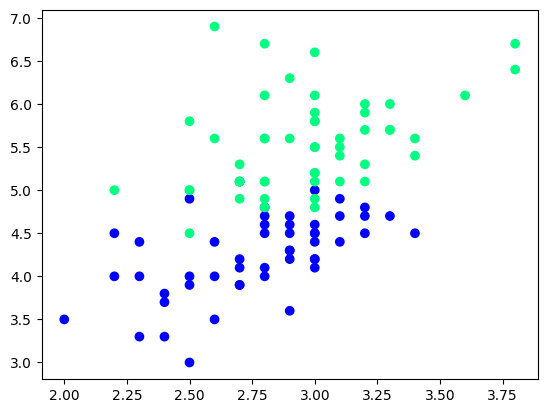

In [621]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'], c=df['Species'], cmap='winter')

# Preparing data for training

In [622]:
df = df.sample(100)
df_train=df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [623]:
print(df.head())

     SepalWidthCm  PetalLengthCm  Species
73            2.8            4.7        1
66            3.0            4.5        1
147           3.0            5.2        2
83            2.7            5.1        1
130           2.8            6.1        2


In [624]:
print(df_train.head())

     SepalWidthCm  PetalLengthCm  Species
117           3.8            6.7        2
101           2.7            5.1        2
145           3.0            5.2        2
144           3.3            5.7        2
131           3.8            6.4        2


In [625]:
print(df_val.head())

     SepalWidthCm  PetalLengthCm  Species
72            2.5            4.9        1
148           3.4            5.4        2
76            2.8            4.8        1
108           2.5            5.8        2
98            2.5            3.0        1


In [626]:
print(df_test.head())

     SepalWidthCm  PetalLengthCm  Species
105           3.0            6.6        2
64            2.9            3.6        1
114           2.8            5.1        2
93            2.3            3.3        1
57            2.4            3.3        1


In [627]:
X_test = df_val.iloc[:,0:2]
y_test = df_val.iloc[:,-1]

In [628]:
# X_test
y_test

72     1
148    2
76     1
108    2
98     1
Name: Species, dtype: int64

# Bagging (Training different models)

In [629]:
def evaluate(clf,X,y):
  clf.fit(X,y)
  plot_tree(clf)
  plt.show()
  plot_decision_regions(X.values,y.values,clf=clf, legend=2)
  y_pred= clf.predict(X_test)
  print(accuracy_score(y_test,y_pred))


## Decision Tree 1

In [630]:
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
117,3.8,6.7,2
144,3.3,5.7,2
101,2.7,5.1,2
145,3.0,5.2,2
131,3.8,6.4,2
137,3.1,5.5,2
86,3.1,4.7,1
137,3.1,5.5,2


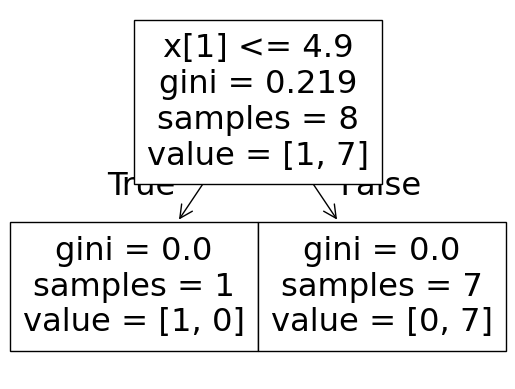

0.8


d:\ML-End-to-End\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


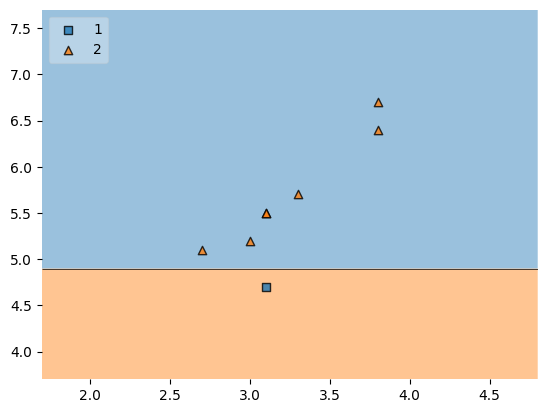

In [631]:
dt_bag1 = DecisionTreeClassifier()

evaluate(dt_bag1,X,y)

## Decision Tree 2

In [632]:
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
117,3.8,6.7,2
86,3.1,4.7,1
144,3.3,5.7,2
145,3.0,5.2,2
73,2.8,4.7,1
117,3.8,6.7,2
54,2.8,4.6,1
86,3.1,4.7,1


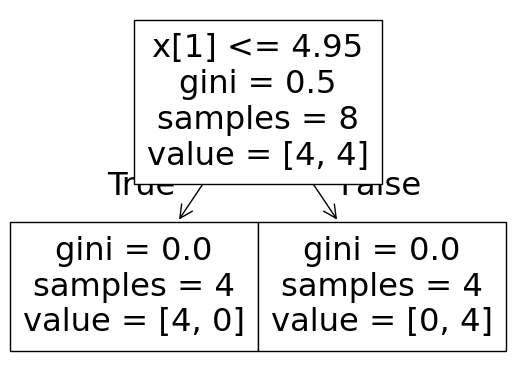

d:\ML-End-to-End\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


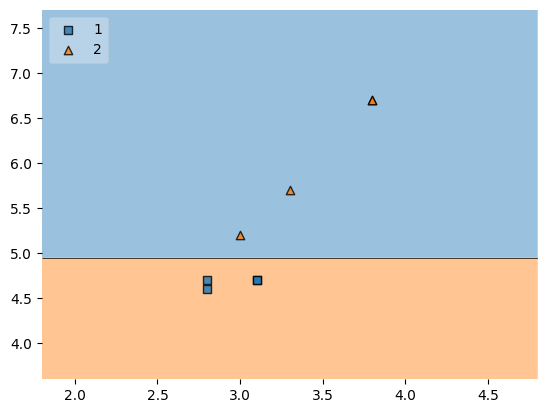

In [633]:
dt_bag2 = DecisionTreeClassifier()

evaluate(dt_bag2,X,y)

## Decision Tree 3

In [634]:
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
131,3.8,6.4,2
145,3.0,5.2,2
73,2.8,4.7,1
101,2.7,5.1,2
137,3.1,5.5,2
86,3.1,4.7,1
131,3.8,6.4,2
131,3.8,6.4,2


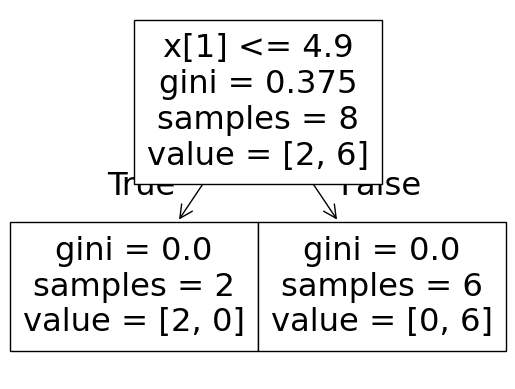

0.8


d:\ML-End-to-End\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


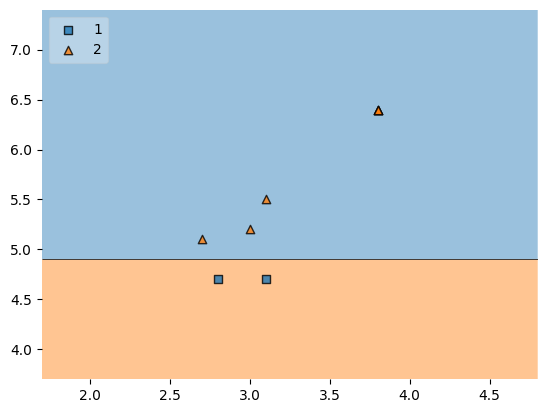

In [635]:
dt_bag3 = DecisionTreeClassifier()

evaluate(dt_bag3,X,y)

# Aggregating (Prediction)

In [636]:
df_test

,SepalWidthCm,PetalLengthCm,Species
105,3.0,6.6,2
64,2.9,3.6,1
114,2.8,5.1,2
93,2.3,3.3,1
57,2.4,3.3,1


In [637]:
# query_point = np.array([3.1,4.4]).reshape((1,2))
query_point = np.array([df_test['SepalWidthCm'].iloc[0] , df_test['PetalLengthCm'].iloc[0]]).reshape((1,2))

dt_bag1_pred = dt_bag1.predict(query_point)
dt_bag2_pred = dt_bag2.predict(query_point)
dt_bag3_pred = dt_bag3.predict(query_point)

print('Predictor 1: ', dt_bag1_pred)
print('Predictor 2: ', dt_bag2_pred)
print('Predictor 3: ', dt_bag3_pred)

Predictor 1:  [2]
Predictor 2:  [2]
Predictor 3:  [2]


d:\ML-End-to-End\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\ML-End-to-End\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\ML-End-to-End\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Final Prediction By Bagging

In [638]:
if (dt_bag1_pred[0] == dt_bag2_pred[0] == dt_bag3_pred[0]):
  final = dt_bag1_pred[0]

elif(dt_bag1_pred[0] == dt_bag2_pred[0]):
  final = dt_bag1_pred[0]

elif(dt_bag1_pred[0] == dt_bag3_pred[0]):
  final = dt_bag1_pred[0]

elif(dt_bag2_pred[0] == dt_bag3_pred[0]):
  final = dt_bag2_pred[0]

print('Final Prediction by Bagging Algorithm: ', final)

Final Prediction by Bagging Algorithm:  2


# Types of Bagging

## Pasting - row sampling without replacement

In [639]:
df_train

,SepalWidthCm,PetalLengthCm,Species
117,3.8,6.7,2
101,2.7,5.1,2
145,3.0,5.2,2
144,3.3,5.7,2
131,3.8,6.4,2
54,2.8,4.6,1
86,3.1,4.7,1
137,3.1,5.5,2
65,3.1,4.4,1
73,2.8,4.7,1


In [640]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
65,3.1,4.4,1
145,3.0,5.2,2
117,3.8,6.7,2
137,3.1,5.5,2
144,3.3,5.7,2
101,2.7,5.1,2
54,2.8,4.6,1
73,2.8,4.7,1


## Random Subspaces - column sampling with or without replacement

In [644]:
df1 = pd.read_csv('..\\Datasets\\Iris.csv')
df1.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
102,103,7.1,3.0,5.9,2.1,Iris-virginica
137,138,6.4,3.1,5.5,1.8,Iris-virginica
10,11,5.4,3.7,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
105,106,7.6,3.0,6.6,2.1,Iris-virginica
133,134,6.3,2.8,5.1,1.5,Iris-virginica
23,24,5.1,3.3,1.7,0.5,Iris-setosa
75,76,6.6,3.0,4.4,1.4,Iris-versicolor


In [654]:
df1.sample(2,replace=True,axis=1)


,Species,Species
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
...,...,...
145,Iris-virginica,Iris-virginica
146,Iris-virginica,Iris-virginica
147,Iris-virginica,Iris-virginica
148,Iris-virginica,Iris-virginica


# Random Patches - both row and column sampling

In [663]:
df1.sample(8, replace=True).sample(2,replace=True,axis=1)

,SepalWidthCm,SepalLengthCm
11,3.4,4.8
19,3.8,5.1
103,2.9,6.3
148,3.4,6.2
40,3.5,5.0
23,3.3,5.1
130,2.8,7.4
102,3.0,7.1
